第6回の演習です。ここでは、外部モジュールOpenCVの使い方をもう少し説明します。
左上の「ファイル」＞「ドライブにコピーを保存」を選択して、Google DriveにNotebookを保存します。ご自身のGoogleドライブの"Colab Notebooks"フォルダで、保存したNotebookを右クリックし、「アプリで開く」＞「Google Colaboratory」を選択します。その上で、各コードを実行するには、以下のコマンドを実行してください。実行は「再生」ボタンを押します。

In [ ]:
print("Chapter 6")

Chapter 6


# 画像の変換
画像を二値化したり、ぼかしたり、雑音を除去したりする機能を導入します。こうした機能は、コンピュータビジョンの前処理によく使われます。まず、前回同様、画像をファイルとしてGoogle Colaboratory上にアップロードします。google.colabライブラリのfilesモジュールをインポートし、upload関数で画像ファイルをアップロードして下さい。すでにアップロード済みの場合はこの操作は必要ありません。

In [1]:
# ローカル環境では直接画像ファイルを指定
import os
image_filename = "example.png"

続いてファイル名を取得し、OpenCVでこの画像ファイルを読み込めるようにします。 画像のファイル名は辞書のキーに入っていますから、keysメソッドでこれを取り出すのでした。

In [ ]:
# ローカル環境では不要
print(f"使用する画像ファイル: {image_filename}")
print(f"ファイルが存在するか確認: {os.path.exists(image_filename)}")

次に、OpenCVを使うための準備を行います。OpenCV、NumPyをそれぞれインポートし、Google ColaboratoryのNotebook上に画像を表示するためのモジュールをインポートします。

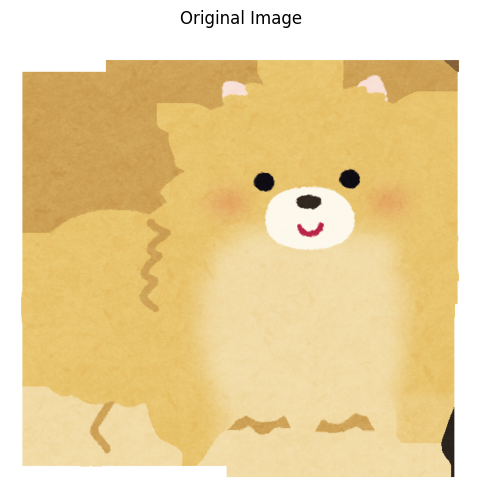

In [2]:
# OpenCVを使う準備
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_image(img, title="Image", cmap=None):
    plt.figure(figsize=(8, 6))
    if len(img.shape) == 3:
        # カラー画像の場合、BGR→RGB変換
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        # グレースケール画像の場合
        plt.imshow(img, cmap='gray' if cmap is None else cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

cv_img = cv2.imread(image_filename)
show_image(cv_img, "Original Image")

## 二値化
画像処理を行う場合、しばしば二値化処理を行います。二値化は、閾値以上に明るい画素を白色に、閾値未満の暗い画素を黒色に変換します。二値化するにはthreshold関数を使います。二値化処理の手順として、まず、カラー画像をグレースケールに変換します。その上で、閾値判定によって二値画像に変換します。
threshold関数の引数には（入力画像, 閾値, maxValue, 二値化の方法）をそれぞれ設定します。引数maxValueは「二値化の方法」によって設定します。例えば、「二値化の方法」を"cv2.THRESH_BINARY"に指定した場合、閾値以下の値を"0"に、閾値より大きい値をmaxValueで指定した値に変換します。

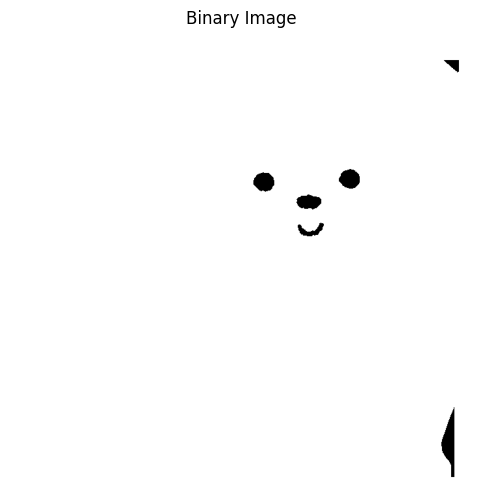

In [3]:
# 二値化
# グレースケールに変換
gray_img = cv2.cvtColor(cv_img, cv2.COLOR_BGR2GRAY)

# 二値化：threshold関数の引数（入力画像, 閾値, maxValue, 二値化の方法）
retval, binary_img = cv2.threshold(gray_img, 120, 255, cv2.THRESH_BINARY)
show_image(binary_img, "Binary Image")

threshold関数を使う際の注意点は、その出力（返り値）が2つあるということです。上記では(retval, binary_img)の2つの変数が設定されています。retvalには閾値を自動的に決めた場合の値が入り、binary_imgには出力画像のデータが入ります。閾値を自動的に決めないなら試行錯誤して適切な閾値を探さないといけません。
「二値化の方法」には"cv2.THRESH_BINARY"の他に、以下の方法を指定できます。
- cv2.THRESH_BINARY_INV
 - 閾値以下の値をmaxValueで指定した値に、閾値より大きい値を"0"に変換します。
- cv2.THRESH_TRUNC
 - 閾値以下の値はそのままに、閾値より大きい値を閾値に変換します。
- cv2.THRESH_TOZERO
 - 閾値以下の値を"0"に、閾値より大きい値をそのままに変換します。
- cv2.THRESH_OTSU
 - 大津の方法で閾値を自動的に決めます。
- cv2.THRESH_TRIANGLE
 - トライアングルアルゴリズムで閾値を自動的に決めます。

閾値： 210.0


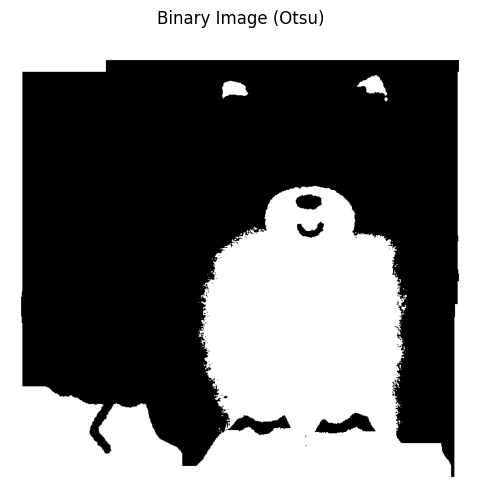

In [4]:
# 大津の方法
# 二値化：threshold関数の引数（入力画像, 閾値, maxValue, 二値化の方法）
retval, binary_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_OTSU)
print("閾値：", retval)           # 閾値の表示
show_image(binary_img, "Binary Image (Otsu)")

閾値： 253.0


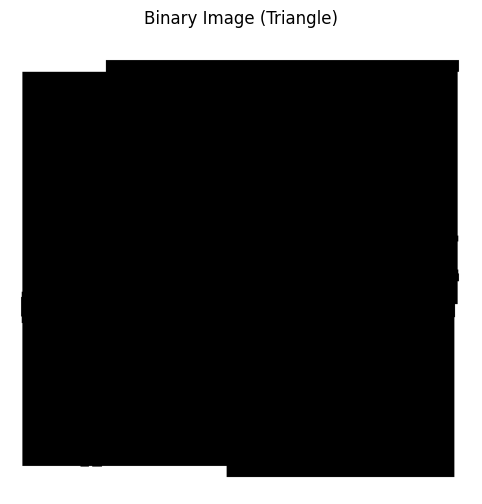

In [5]:
# トライアングルアルゴリズム
# 二値化：threshold関数の引数（入力画像, 閾値, maxValue, 二値化の方法）
retval, binary_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_TRIANGLE)
print("閾値：", retval)           # 閾値の表示
show_image(binary_img, "Binary Image (Triangle)")

## ぼかし（平滑化）
画像をぼかします。これは画像に平滑化フィルタを施すのと等価で、OpenCVには様々な平滑化フィルタが用意されています。主な平滑化フィルタとして以下の関数があります。
- filter2D
 - 空間フィルタを適用します。
- blur
 - 正方形のフィルタで平均を取ります。
- GaussianBlur
 - ガウス分布に基づいて重み付き平均を行います。
- bilateralFilter
 - エッジを保存しながら画像をぼかします。

### filter2D関数
filter2D関数の引数には（入力画像, 出力画像の型, カーネル）を指定します。出力画像の型を"-1"に設定したら、入力画像と同じ型になります。カーネルというのは、空間フィルタの重み（係数）のことです。例えば、3×3のフィルタの場合、画像の3×3の局所領域の画素値と積和演算します。このカーネルを変更することで、様々な空間フィルタを作ることができます。

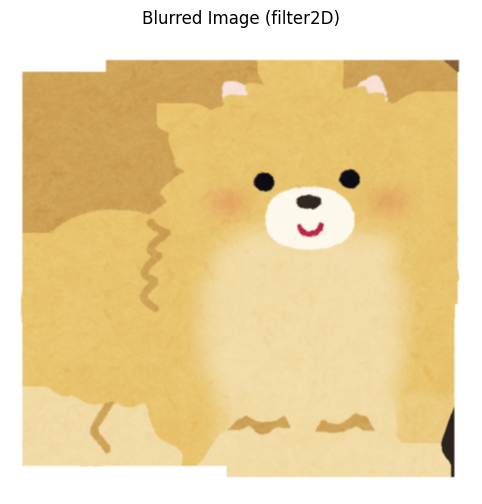

In [6]:
# filter2D関数によるぼかし処理
# カーネル（3×3）
kernel = np.array([[1/9, 1/9, 1/9],
                   [1/9, 1/9, 1/9],
                   [1/9, 1/9, 1/9]])
# 空間フィルタ：filter2D（入力画像, 出力画像の型, カーネル）
blur_img = cv2.filter2D(cv_img, -1, kernel)
show_image(blur_img, "Blurred Image (filter2D)")

### blur関数
blur関数の引数には（入力画像, カーネルサイズ）を指定します。カーネルサイズは空間フィルタの重み（係数）の数のことで、配列で与えます。例えば、(5, 5)なら、5×5の平滑化フィルタになります。

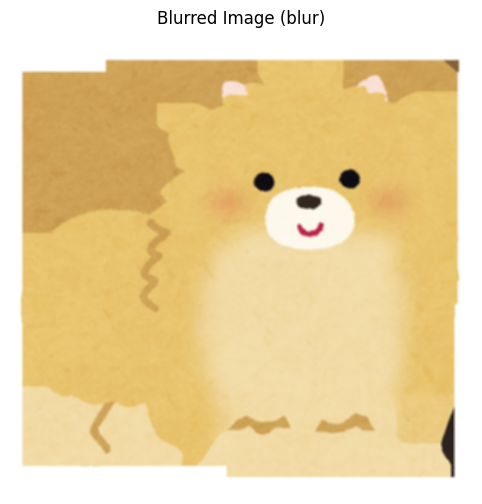

In [7]:
# blur関数によるぼかし処理
blur_img = cv2.blur(cv_img, (5,5))            # カーネル（5×5）
show_image(blur_img, "Blurred Image (blur)")

### GaussianBlur関数
GaussianBlur関数の引数には（入力画像, カーネルサイズ, ガウス分布の標準偏差）を指定します。カーネルサイズには奇数を与えます。ガウス分布の標準偏差には横軸と縦軸を与えるのですが、1つしか指定しなければ、両軸が同じとみなされます。また、"0"を指定すると、カーネルサイズに基づいて自動計算されます。

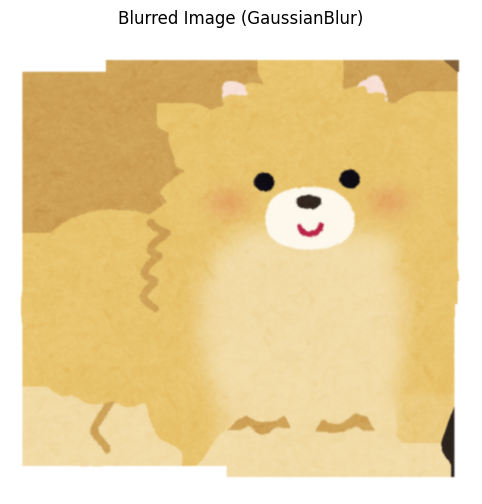

In [8]:
# GaussianBlur関数によるぼかし処理
blur_img = cv2.GaussianBlur(cv_img, (5,5), 0)            # カーネル（5×5）
show_image(blur_img, "Blurred Image (GaussianBlur)")

### bilateralFilter関数
bilateralFilter関数の引数には（入力画像, ぼかし領域のサイズ, 色空間の標準偏差, 距離空間の標準偏差）を指定します。ぼかし領域のサイズが大きいほど、ぼかしが強くなります。色空間の標準偏差が大きいほど、色がより異なる画素どうしを混合して平滑化します。距離空間の標準偏差が大きいほど、より遠くの画素どうしを混合して平滑化します。

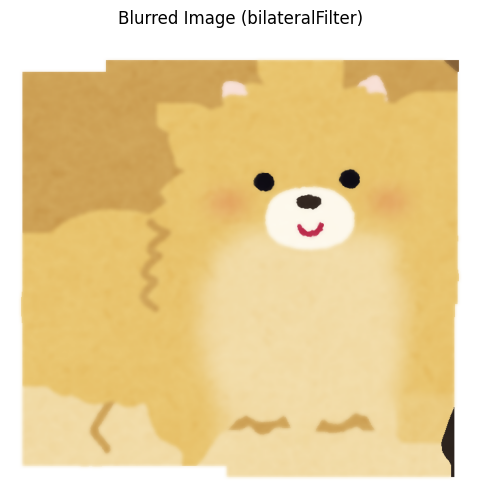

In [9]:
# bilateralFilter関数によるぼかし処理
blur_img = cv2.bilateralFilter(cv_img, 10, 150, 150)
show_image(blur_img, "Blurred Image (bilateralFilter)")

## 雑音の除去
画像には雑音（ノイズ）が混入することがあります。雑音の種類によって、適用すべきフィルタは異なるのですが、ここではゴマ塩ノイズに対してfastNlMeansDenoisingColored関数を使います。この関数はNon-Local Means Denoisingという手法を使っていて、画像の中から類似領域を探し、その平均値を出力画像の対応する画素値に設定します。fastNlMeansDenoisingColored関数の主な引数には以下があります。「フィルタの強さ」に大きい値を入れると、雑音を除去できますが、画像の詳細部分もなくなります。
- 入力画像
- 出力画像
- フィルタの強さ
- カラー用フィルタの強さ
- テンプレートウィンドウの大きさ（奇数：7推奨）
- 探索ウィンドウの大きさ（奇数：21推奨））

In [11]:
# fastNlMeansDenoisingColored関数
h, w, ch = cv_img.shape         # 縦, 横, チャネル数
print("image : ", h, w, ch)
#ノイズ画像の作成
noise_level = 100
noise = np.random.randint(-noise_level, noise_level, (h,w,ch))
print("noise : ", noise.shape)
noise_img = cv_img + noise      # 画像にノイズを付与
noise_img = np.where(noise_img > 255, 255, noise_img)     # 上限：255
noise_img = np.where(noise_img < 0, 0, noise_img)         # 下限：0
show_image(noise_img, "Noisy Image")
# ノイズ除去
uint8_img=np.uint8(noise_img)   # unit8：符号なし8ビット整数型
denoise_img = cv2.fastNlMeansDenoisingColored(uint8_img, None, 20, 20, 7, 21)
show_image(denoise_img, "Denoised Image")

image :  708 708 3
noise :  (708, 708, 3)


error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<3, 4>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 4 (CV_32S)


<Figure size 800x600 with 0 Axes>

## 膨張と収縮
画像の膨張・収縮はモルフォロジー変換の一種です。モルフォロジー変換というのは、画像に対して単純なフィルタ処理を行う変換を指します。このフィルタをカーネル（構造的要素）ということがあり、フィルタの重み（係数）を指します。

### 膨張
膨張は、画像に写る物体に対してその境界線を太くする処理です。これは、フィルタ範囲内に画素値が"1"の画素が一つでもあれば、画像のその範囲内の画素値を全て"1"にします。画像の中で画素値"1"の領域が増えます。膨張処理を行うにはdilate関数を使います。dilate関数の引数には（入力画像, カーネル, 繰り返し回数）を指定します。以下の例では、カーネル（3×3サイズ）の要素の値をすべて"1"に設定しています。

In [ ]:
# 膨張
gray_img = cv2.cvtColor(cv_img, cv2.COLOR_BGR2GRAY)           # グレースケール変換
retval, binary_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_OTSU)     # 二値化
print("閾値：", retval)                                       # 閾値の表示
inverse_img = cv2.bitwise_not(binary_img)                     # 反転
show_image(inverse_img, "Inverted Binary Image")
kernel = np.ones((3,3), np.uint8)                             # unit8：符号なし8ビット整数型
print(kernel)
dilate_img = cv2.dilate(inverse_img, kernel, iterations = 1)    # 繰り返し1回
show_image(dilate_img, "Dilated Image")

### 収縮
収縮は、画像に写る物体に対してその境界線を細くする処理です。これは、フィルタ範囲内の画素値が全て"1"ならその注目画素を"1"とし、1つでも"0"があればその注目画素は"0"とします。画像の中で画素値"1"の領域が減ります。収縮処理を行うにはerode関数を使います。erode関数の引数には（入力画像, カーネル, 繰り返し回数）を指定します。以下の例では、カーネル（3×3サイズ）の要素の値をすべて"1"に設定しています。

In [ ]:
# 収縮
gray_img = cv2.cvtColor(cv_img, cv2.COLOR_BGR2GRAY)           # グレースケール変換
retval, binary_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_OTSU)     # 二値化
print("閾値：", retval)                                       # 閾値の表示
inverse_img = cv2.bitwise_not(binary_img)                     # 反転
show_image(inverse_img, "Inverted Binary Image")
kernel = np.ones((3,3), np.uint8)                             # unit8：符号なし8ビット整数型
print(kernel)
erode_img = cv2.erode(inverse_img, kernel, iterations = 1)    # 繰り返し1回
show_image(erode_img, "Eroded Image")